# Introduction
# Space_mission_analysis

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

### Import Statements

In [81]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

In [6]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
df_data.shape

(4324, 9)

In [8]:
"it has 4324 rows and 9 columns"

'it has 4324 rows and 9 columns'

In [9]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [10]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [11]:
"yes in th price column it contains  lots of null values"

'yes in th price column it contains  lots of null values'

In [12]:
df_data.duplicated().sum()

0

In [13]:
"it does not contain any null values"

'it does not contain any null values'

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [14]:
junk_col = ['Unnamed: 0.1','Unnamed: 0']

for i in junk_col:
    del df_data[i]

In [15]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [17]:
df_data['Price'] = np.where(pd.isna(df_data['Price']),
                           0,
                           df_data['Price'])

In [18]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,0,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,0,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,0,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,0,Success


In [19]:
df_data['Price'] = df_data['Price'].str.replace(',','')

In [20]:
df_data['Price'] = df_data['Price'].astype(float)

In [21]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           964 non-null    float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


In [22]:
temporary_mean = df_data['Price'].mean().round(2)

In [23]:
df_data['Price'] = np.where(pd.isna(df_data['Price']),
                            temporary_mean,
                            df_data['Price'])

In [24]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,153.79,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,153.79,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,153.79,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,153.79,Success


In [25]:
df_data['Date'] = pd.to_datetime(df_data['Date'],utc=True)

In [26]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           4324 non-null   float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


In [27]:
df_data['Date'] = pd.to_datetime(df_data['Date'], format='%A %B %d %Y %H:%M')

In [28]:
df_data['Date']

0      2020-08-07 05:12:00+00:00
1      2020-08-06 04:01:00+00:00
2      2020-08-04 23:57:00+00:00
3      2020-07-30 21:25:00+00:00
4      2020-07-30 11:50:00+00:00
                  ...           
4319   1958-02-05 07:33:00+00:00
4320   1958-02-01 03:48:00+00:00
4321   1957-12-06 16:44:00+00:00
4322   1957-11-03 02:30:00+00:00
4323   1957-10-04 19:28:00+00:00
Name: Date, Length: 4324, dtype: datetime64[ns, UTC]

In [29]:
df_data['Date']

0      2020-08-07 05:12:00+00:00
1      2020-08-06 04:01:00+00:00
2      2020-08-04 23:57:00+00:00
3      2020-07-30 21:25:00+00:00
4      2020-07-30 11:50:00+00:00
                  ...           
4319   1958-02-05 07:33:00+00:00
4320   1958-02-01 03:48:00+00:00
4321   1957-12-06 16:44:00+00:00
4322   1957-11-03 02:30:00+00:00
4323   1957-10-04 19:28:00+00:00
Name: Date, Length: 4324, dtype: datetime64[ns, UTC]

In [30]:
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,153.79,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,153.79,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,153.79,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,153.79,Success


In [31]:
df_data = df_data.rename(columns={'Detail': 'aircraft_name'})

#  Now our data is ready for further analysis

## Descriptive Statistics

In [32]:
df_data.describe()

,Price
count,"4,324.00"
mean,153.79
std,136.14
min,5.30
25%,153.79
50%,153.79
75%,153.79
max,"5,000.00"


In [33]:
"Because we have only one numeric column"

'Because we have only one numeric column'

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [34]:
organization_counts = df_data.groupby('Organisation')['aircraft_name'].count()

In [35]:
organization_counts

Organisation
AEB                    3
AMBA                   8
ASI                    9
Arianespace          279
Arm??e de l'Air        4
Blue Origin           12
Boeing               136
CASC                 251
CASIC                  5
CECLES                 4
CNES                   8
Douglas                1
EER                    1
ESA                   13
Eurockot              13
ExPace                10
Exos                   4
General Dynamics     251
IAI                   11
ILS                   46
IRGC                   1
ISA                   13
ISAS                  30
ISRO                  76
JAXA                   7
KARI                   3
KCST                   5
Khrunichev             1
Kosmotras             22
Land Launch            7
Landspace              1
Lockheed              79
MHI                   84
MITT                   7
Martin Marietta      114
NASA                 203
Northrop              83
OKB-586                2
OneSpace               1
RAE         

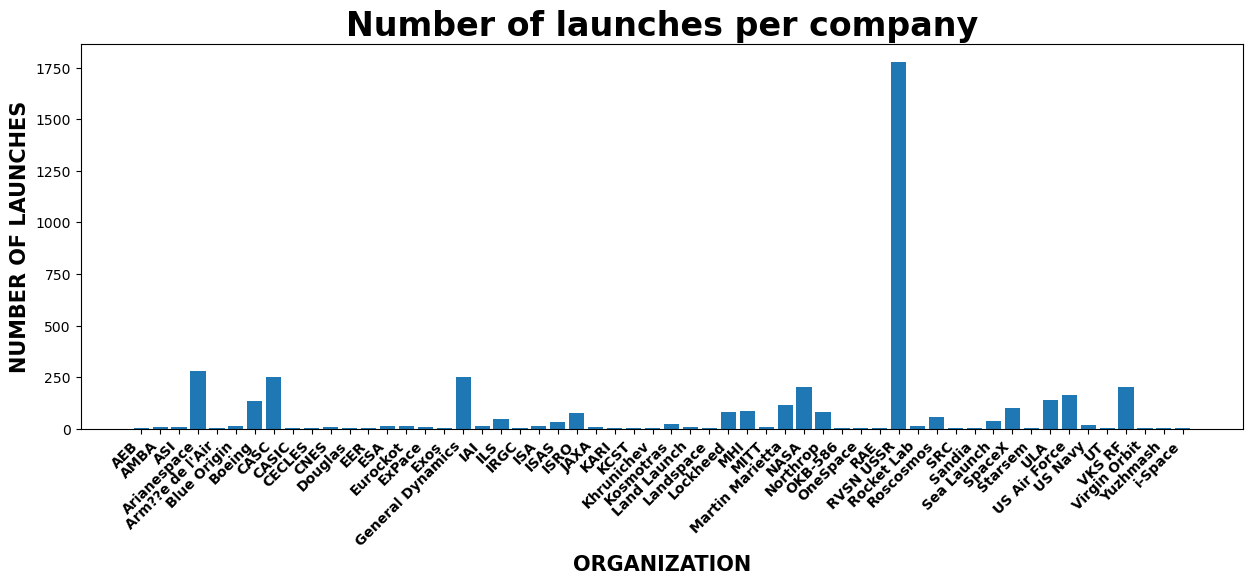

In [36]:
plt.figure(figsize=(15,5))
plt.bar(x=organization_counts.index,
        height=organization_counts.values)
plt.title("Number of launches per company",fontsize=24, fontweight="bold")
plt.xlabel("ORGANIZATION",fontsize=15, fontweight="bold")
plt.ylabel("NUMBER OF LAUNCHES",fontsize=15, fontweight="bold")
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.show()

In [37]:
"By observing the above visualization we conclude that RVSN USSRhas the number of launches"

'By observing the above visualization we conclude that RVSN USSRhas the number of launches'

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [38]:
rocket_count = df_data['Rocket_Status'].value_counts()
rocket_count

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

In [39]:
df_data.columns

Index(['Organisation', 'Location', 'Date', 'aircraft_name', 'Rocket_Status',
       'Price', 'Mission_Status'],
      dtype='object')

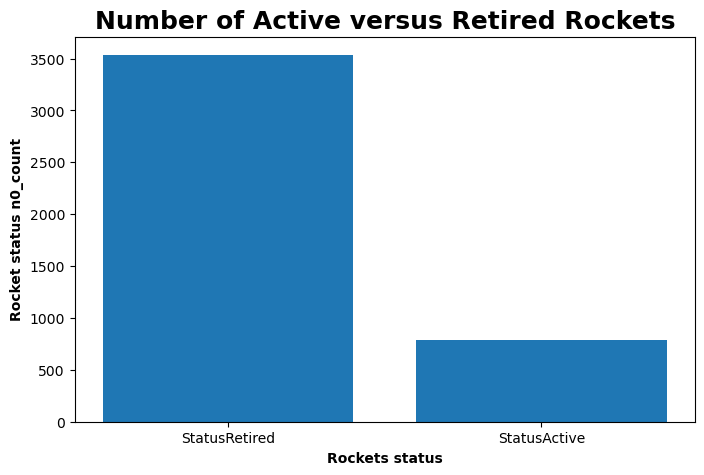

In [40]:
plt.figure(figsize=(8,5))

plt.bar(x=rocket_count.index,
       height=rocket_count.values)

plt.title("Number of Active versus Retired Rockets",fontsize=18,fontweight="bold")
plt.xlabel("Rockets status",fontsize=10,fontweight="bold")
plt.ylabel("Rocket status n0_count",fontsize=10,fontweight="bold")
plt.show()

# "There are less number of active rockets and more retired"

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [41]:
miss_stscount = df_data['Mission_Status'].value_counts()

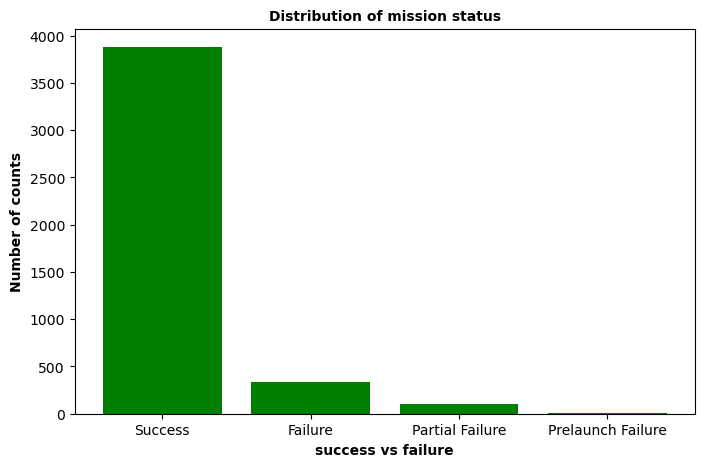

In [42]:
plt.figure(figsize=(8,5))

plt.bar(x=miss_stscount.index,
       height=miss_stscount.values,
       color="green")
plt.title("Distribution of mission status",fontsize=10,fontweight="bold")
plt.xlabel("success vs failure",fontsize=10,fontweight="bold")
plt.ylabel("Number of counts",fontsize=10,fontweight="bold")

plt.show()

# Mission success rate is more than any else category

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

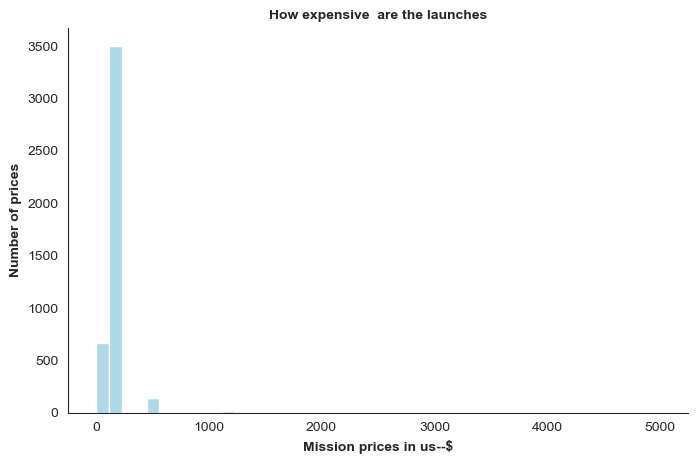

In [43]:
sns.set_style("white")

plt.figure(figsize=(8,5))
plt.hist(x=df_data['Price'],bins=45,
        color="lightblue")

plt.title("How expensive  are the launches",fontsize=10,fontweight="bold")
plt.xlabel("Mission prices in us--$",fontsize=10,fontweight="bold")
plt.ylabel("Number of prices",fontsize=10,fontweight="bold")
plt.xticks()
sns.despine()

plt.show()

# by observing above histogram it is not plot properly  i think because we have 80 % missing values

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [45]:
df_data

,Organisation,Location,Date,aircraft_name,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,153.79,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,153.79,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,153.79,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,153.79,Success


In [46]:
money_spent = df_data.groupby("Organisation")['Price'].sum()
money_spent

Organisation
AEB                    461.37
AMBA                 1,230.32
ASI                  1,384.11
Arianespace         44,488.57
Arm??e de l'Air        615.16
Blue Origin          1,845.48
Boeing              21,079.91
CASC                20,642.73
CASIC                  768.95
CECLES                 615.16
CNES                 1,230.32
Douglas                153.79
EER                     20.00
ESA                  1,882.48
Eurockot               543.40
ExPace               1,412.41
Exos                   615.16
General Dynamics    38,601.29
IAI                  1,691.69
ILS                  6,395.07
IRGC                   153.79
ISA                  1,999.27
ISAS                 4,613.70
ISRO                 3,561.11
JAXA                   783.16
KARI                   461.37
KCST                   768.95
Khrunichev             153.79
Kosmotras              638.00
Land Launch          1,076.53
Landspace              153.79
Lockheed            11,199.09
MHI                 10,760.

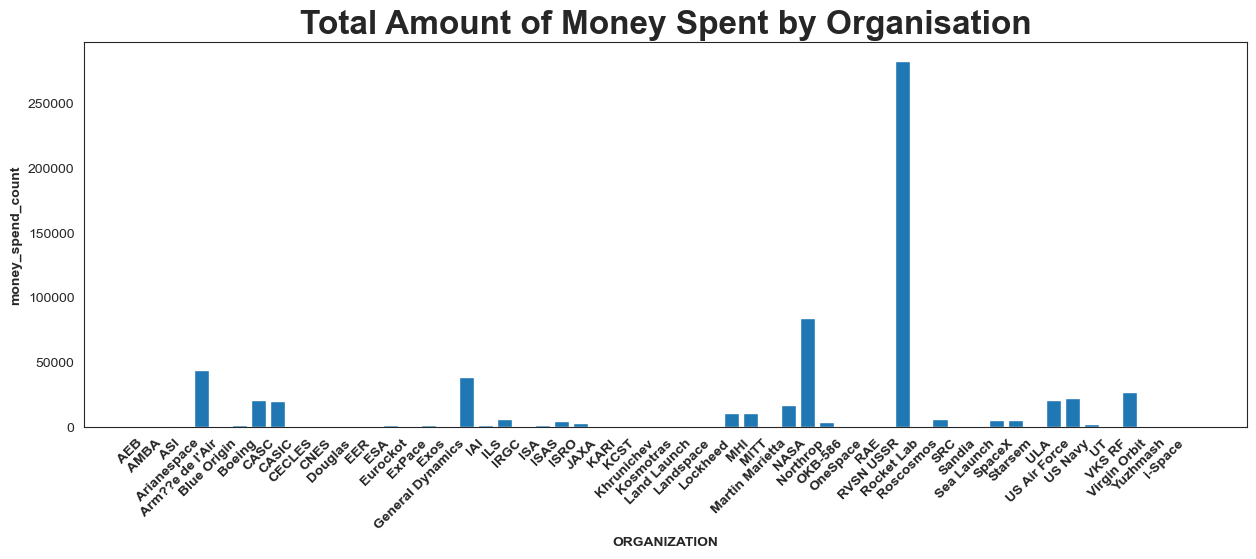

In [47]:
plt.figure(figsize=(15,5))
plt.bar(x=money_spent.index,
        height=money_spent.values)
plt.title("Total Amount of Money Spent by Organisation",fontsize=24, fontweight="bold")
plt.xlabel("ORGANIZATION",fontsize=10, fontweight="bold")
plt.ylabel("money_spend_count",fontsize=10, fontweight="bold")
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.show()

# 😱 RVSN USSAR Organization spends about 282,977.25 dollors on launching and it has also large number of launching

# Chart the Number of Launches per Year

In [48]:
df_data['Date'] = pd.to_datetime(df_data['Date'])

In [49]:
date = df_data['Date'].dt.year
no_of_launches = df_data.groupby(df_data['Date'].dt.year)['aircraft_name'].count()
no_of_launches

Date
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: aircraft_name, Length: 64, dtype: int64

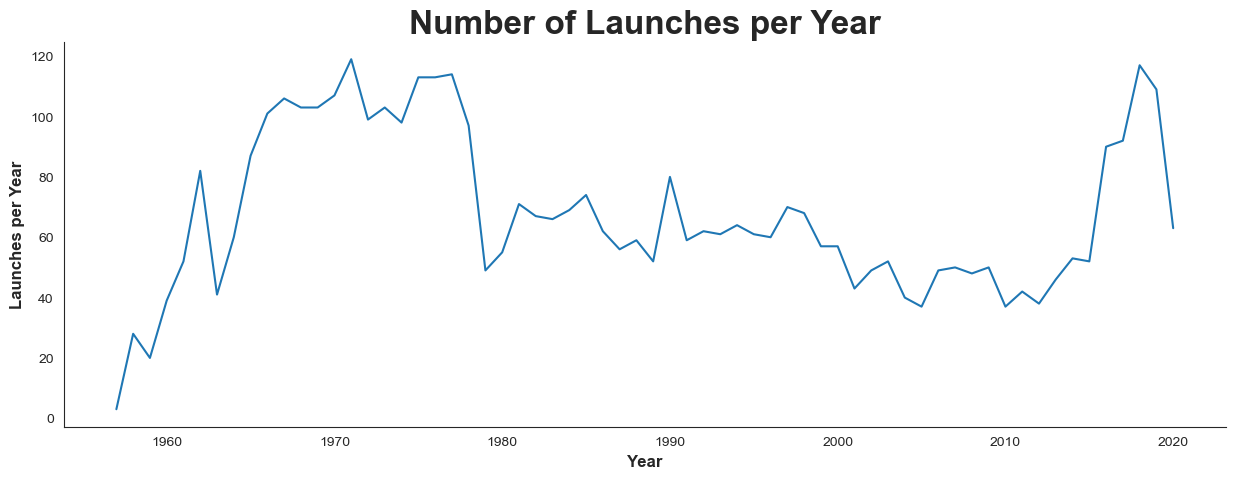

In [50]:
plt.figure(figsize=(15, 5))
plt.plot(no_of_launches.index, no_of_launches.values)

plt.title("Number of Launches per Year", fontsize=24, fontweight="bold")
plt.xlabel("Year", fontsize=12, fontweight="bold")
plt.ylabel("Launches per Year", fontsize=12, fontweight="bold")

# Specify x-ticks for every year
#plt.xticks(ticks=no_of_launches.index, labels=no_of_launches.index, rotation=45, ha='right', fontweight='bold')
sns.despine()

plt.show()



# By observing the abov chart we can say that between 1964 to 1980 there are      more number of launches
# after that it is decrease for some years and then rise from 2011 to 2018

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [51]:
df_data.head()

,Organisation,Location,Date,aircraft_name,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,153.79,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success


In [52]:
df_data['Date'].dt.strftime('%b').unique()

array(['Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan', 'Dec',
       'Nov', 'Oct', 'Sep'], dtype=object)

In [53]:
launch_month = df_data.groupby(df_data['Date'].dt.strftime('%b'))['Rocket_Status'] .count()
launch_month
launch_month = pd.DataFrame(launch_month)
launch_month

,Rocket_Status
Date,
Apr,383
Aug,373
Dec,450
Feb,336
Jan,268
Jul,351
Jun,402
Mar,353
May,326


In [54]:
rolling_avg_window = 3  # Adjust window size as needed
launch_month['Rolling Average'] = launch_month['Rocket_Status'].rolling(window=rolling_avg_window).mean()


In [55]:
launch_month.isna().sum()

Rocket_Status      0
Rolling Average    2
dtype: int64

In [56]:
launch_month['Rolling Average'] = np.where(pd.isna(launch_month['Rolling Average']),
                                           launch_month['Rolling Average'].mean(),
                                           launch_month['Rolling Average'])

In [57]:
launch_month

,Rocket_Status,Rolling Average
Date,,
Apr,383,357.40
Aug,373,357.40
Dec,450,402.00
Feb,336,386.33
Jan,268,351.33
Jul,351,318.33
Jun,402,340.33
Mar,353,368.67
May,326,360.33


In [58]:
launch_month = launch_month.rename(columns={'Rocket_Status':'no_of_launches'})

In [59]:
launch_month

,no_of_launches,Rolling Average
Date,,
Apr,383,357.40
Aug,373,357.40
Dec,450,402.00
Feb,336,386.33
Jan,268,351.33
Jul,351,318.33
Jun,402,340.33
Mar,353,368.67
May,326,360.33


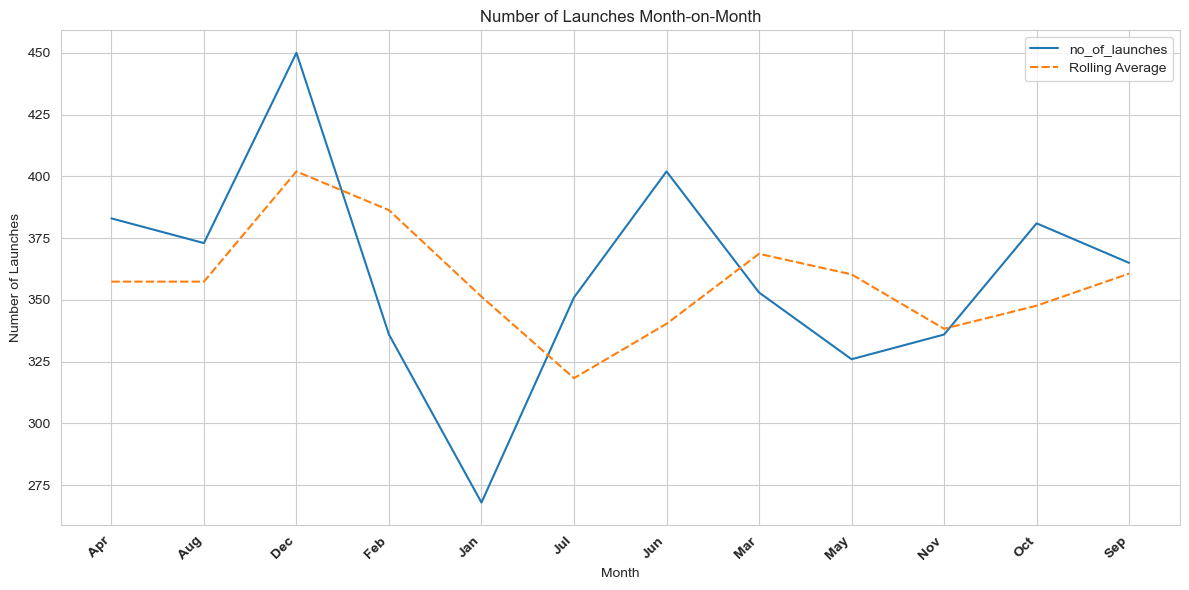

In [60]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(data=launch_month[['no_of_launches', 'Rolling Average']])
plt.title('Number of Launches Month-on-Month')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.tight_layout()
plt.show()

#  Observations on above line graph
1. IN the month of january,march,may,november the number of launches are very less below than average
2. april,August,December,July,Juneoctober,september month has more launches than average number of launches

so.we can say that midyear month and the endyear month have more number of launches-----april,August,December,July,June,october,september

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

1. April,august,december,June,july,october,september---  these month are the highest number of launches so these are the most popular month for space mission launching

  2.January --this month is the less popular month for the space mission launch

3.best weather for the most space launches according to the data are april,august,december

# How has the Launch Price varied Over Time? 
9
Create a line chart that shows the average price of rocket launches over time. 

In [61]:
price_overtime = df_data.groupby(df_data['Date'].dt.strftime('%b'))['Price'].sum()


In [62]:
price_overtime = pd.DataFrame(price_overtime)
price_overtime

,Price
Date,
Apr,"59,638.46"
Aug,"54,987.95"
Dec,"67,799.43"
Feb,"51,573.77"
Jan,"41,127.93"
Jul,"53,948.50"
Jun,"59,205.44"
Mar,"53,151.22"
May,"54,850.24"


In [63]:
price_overtime['Rolling Average'] = price_overtime['Price'].rolling(window=rolling_avg_window).mean()

In [64]:
price_overtime

,Price,Rolling Average
Date,,
Apr,"59,638.46",NaN
Aug,"54,987.95",NaN
Dec,"67,799.43","60,808.61"
Feb,"51,573.77","58,120.38"
Jan,"41,127.93","53,500.38"
Jul,"53,948.50","48,883.40"
Jun,"59,205.44","51,427.29"
Mar,"53,151.22","55,435.05"
May,"54,850.24","55,735.63"


In [65]:
price_overtime['Rolling Average'] = np.where(pd.isna(price_overtime['Rolling Average']),
                                           price_overtime['Rolling Average'].mean(),
                                           price_overtime['Rolling Average'])

In [66]:
price_overtime

,Price,Rolling Average
Date,,
Apr,"59,638.46","55,264.55"
Aug,"54,987.95","55,264.55"
Dec,"67,799.43","60,808.61"
Feb,"51,573.77","58,120.38"
Jan,"41,127.93","53,500.38"
Jul,"53,948.50","48,883.40"
Jun,"59,205.44","51,427.29"
Mar,"53,151.22","55,435.05"
May,"54,850.24","55,735.63"


# 

In [67]:
price_overtime['Rolling Average'].max()

60808.613333333335

In [68]:
price_overtime['Rolling Average'].min()

48883.4

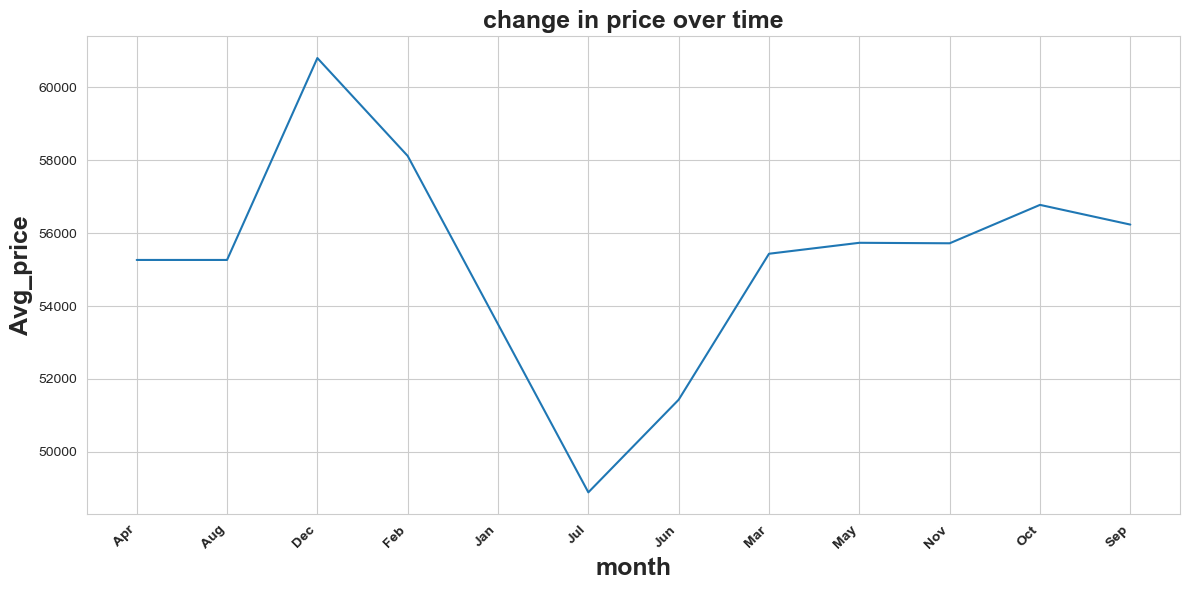

In [69]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

sns.lineplot(data=price_overtime['Rolling Average'])
plt.title('change in price over time',fontsize=18,fontweight='bold')
plt.xlabel('month',fontsize=18,fontweight='bold')
plt.ylabel('Avg_price',fontsize=18,fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.tight_layout()
plt.show()

# above chart observation
1. there is highest spending average price month "december"
2. lowest number of spending  average price month is "july"

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [70]:
launch=df_data['Date'].dt.year
launch
launches_grouped = df_data.groupby(['Organisation', launch]).size().reset_index(name='Number of Launches')

In [71]:
launches_grouped.sort_values(by='Number of Launches',ascending=False)



,Organisation,Date,Number of Launches
517,RVSN USSR,1977,97
516,RVSN USSR,1976,95
511,RVSN USSR,1971,93
515,RVSN USSR,1975,89
510,RVSN USSR,1970,87
...,...,...,...
292,JAXA,2013,1
278,ISRO,2006,1
277,ISRO,2005,1
276,ISRO,2004,1


In [72]:
launches_grouped.max()

Organisation          i-Space
Date                     2020
Number of Launches         97
dtype: object

In [73]:
launches_grouped.min()

Organisation           AEB
Date                  1957
Number of Launches       1
dtype: object

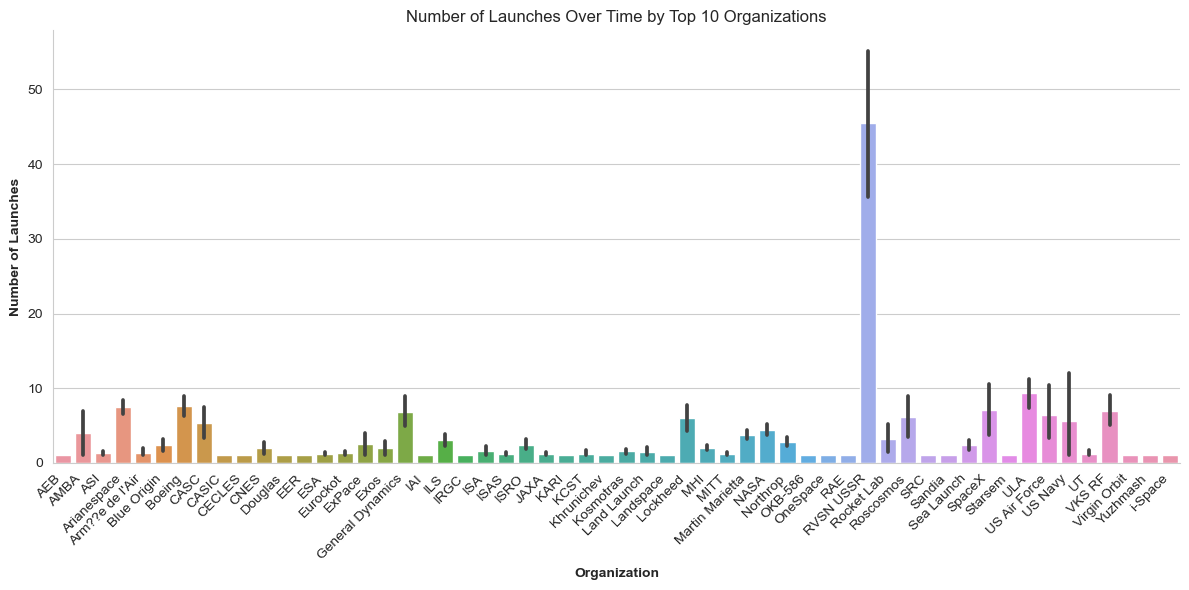

In [74]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

sns.barplot(data=launches_grouped,
            x='Organisation',
            y='Number of Launches'
            )  # Removing error bars to better visualize the data

plt.title('Number of Launches Over Time by Top 10 Organizations')
plt.xlabel('Organization',fontweight="bold")
plt.ylabel('Number of Launches',fontweight="bold")
#plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
sns.despine()
plt.show()

# Top 10 Organisations by launch number
    1.RVSN USSR
    2.US AIR FORCE
    3.CASC
    4.GENERAL DYNAMICS
    5.VKS RF
    6.SPACE X
    7.ULA
    8.ROSCOSMOS
    9.BOING
    10.ARIANESPACE

# 

## Chart the Total Number of Mission Failures Year on Year.

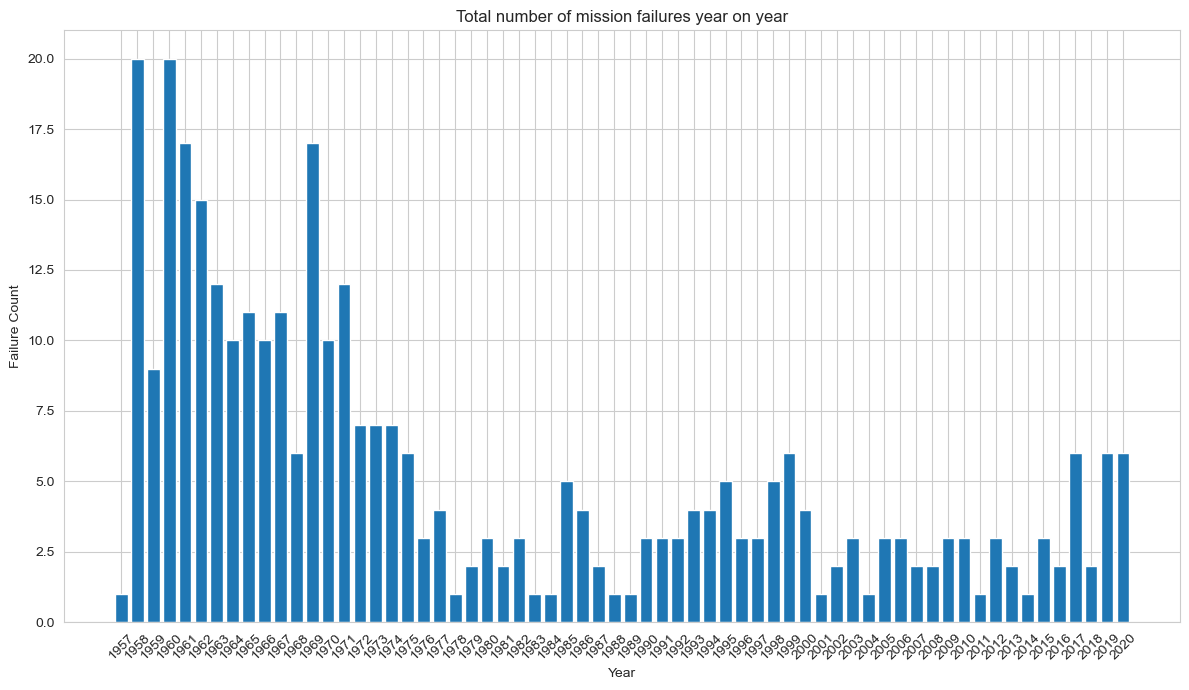

In [75]:
failure_counts = df_data[df_data["Mission_Status"] == "Failure"].groupby(df_data['Date'].dt.year).size()

plt.figure(figsize=(12,7))
plt.bar(x=failure_counts.index,
        height=failure_counts.values)
plt.title("Total number of mission failures year on year")
plt.xlabel("Year")
plt.ylabel("Failure Count")
plt.xticks(failure_counts.index,rotation=45)  # Set x-axis ticks to the years
plt.tight_layout()
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

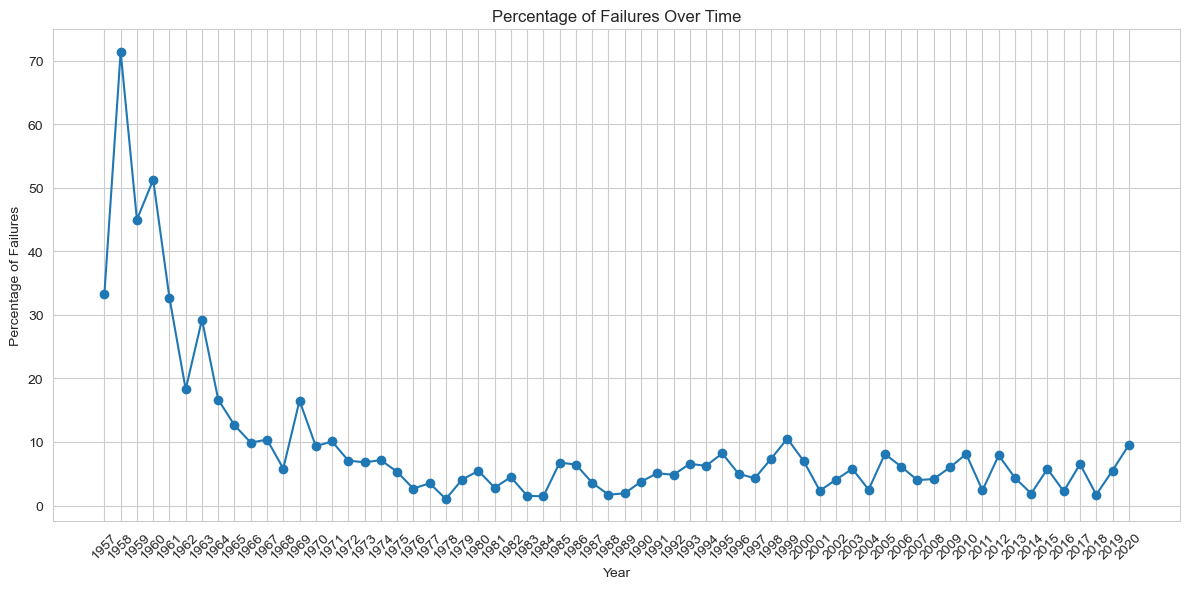

In [76]:
import matplotlib.pyplot as plt

# Calculate the total number of missions for each year
total_missions = df_data.groupby(df_data['Date'].dt.year).size()

# Calculate the total number of failures for each year
total_failures = df_data[df_data["Mission_Status"] == "Failure"].groupby(df_data['Date'].dt.year).size()

# Calculate the percentage of failures for each year
failure_percentage = (total_failures / total_missions) * 100

plt.figure(figsize=(12, 6))
plt.plot(failure_percentage.index, failure_percentage.values, marker='o', linestyle='-')
plt.title("Percentage of Failures Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage of Failures")
plt.xticks(failure_percentage.index,rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [77]:
total_failures

Date
1957     1
1958    20
1959     9
1960    20
1961    17
        ..
2016     2
2017     6
2018     2
2019     6
2020     6
Length: 64, dtype: int64

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

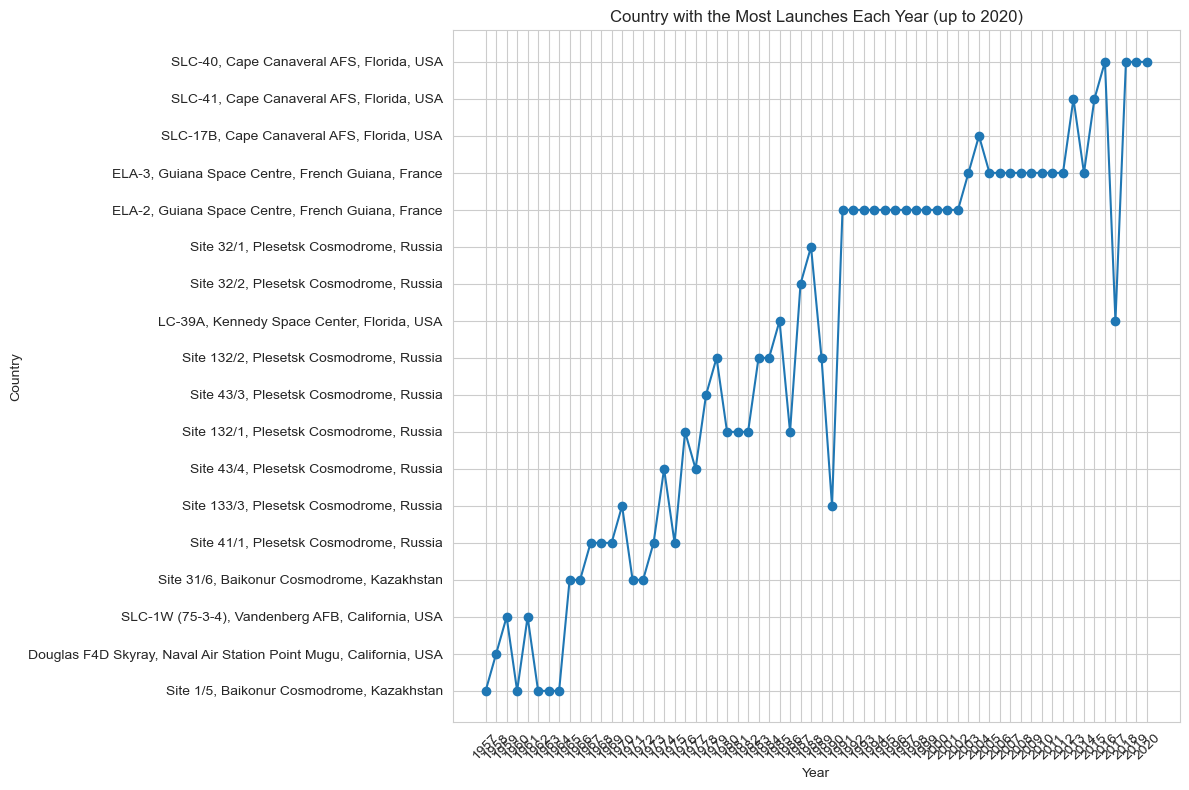

In [78]:
import matplotlib.pyplot as plt

# Assuming df_data contains the DataFrame with mission data
# Make sure 'Date' column is a datetime object

# Filter data up to and including 2020
df_data_2020 = df_data[df_data['Date'].dt.year <= 2020]

# Group data by year and country and count the number of launches
launch_counts = df_data_2020.groupby([df_data_2020['Date'].dt.year, 'Location']).size()

# Find the country with the highest number of launches for each year
max_launch_country = launch_counts.groupby(level=0).idxmax().apply(lambda x: x[1])

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(max_launch_country.index, max_launch_country.values, marker='o', linestyle='-')
plt.title("Country with the Most Launches Each Year (up to 2020)")
plt.xlabel("Year")
plt.ylabel("Country")
plt.xticks(max_launch_country.index,rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

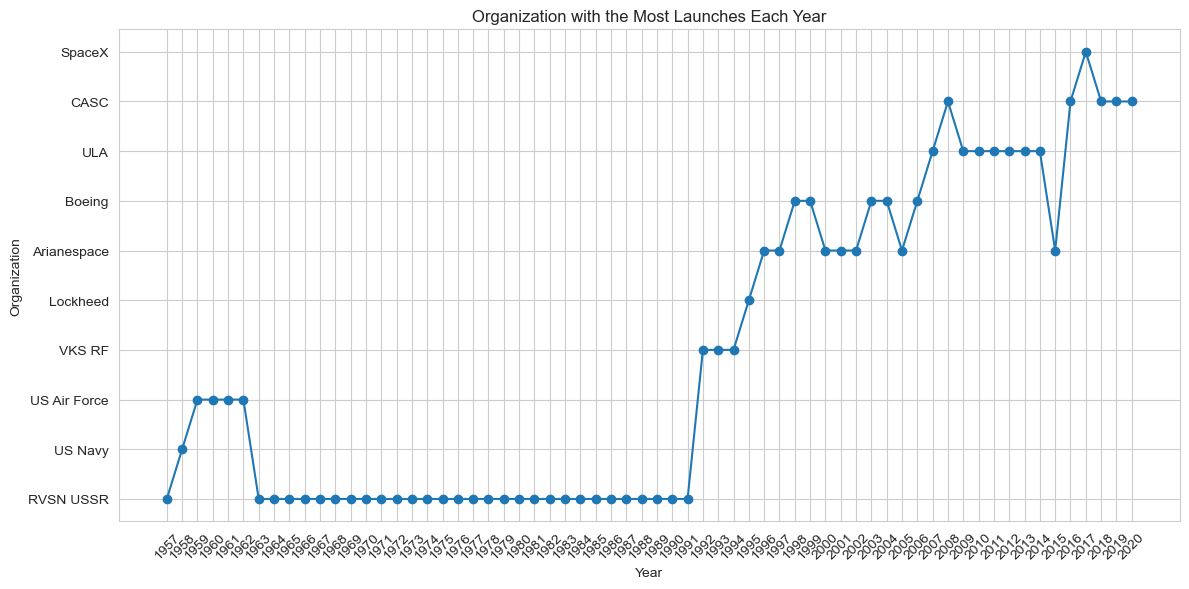

Dominant organization in the 1970s: RVSN USSR
Dominant organization in the 1980s: RVSN USSR
Dominant organization in 2018, 2019, and 2020: CASC


In [79]:
import matplotlib.pyplot as plt

# Group data by year and organisation and count the number of launches
yearly_launches = df_data.groupby([df_data['Date'].dt.year, 'Organisation']).size()

# Find the organization with the maximum number of launches for each year
max_launch_organization = yearly_launches.groupby(level=0).idxmax().apply(lambda x: x[1])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(max_launch_organization.index, max_launch_organization.values, marker='o', linestyle='-')
plt.title("Organization with the Most Launches Each Year")
plt.xlabel("Year")
plt.ylabel("Organization")
plt.xticks(max_launch_organization.index,rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Identify dominant organizations in the 1970s, 1980s, and recent years
dominant_1970s = max_launch_organization.loc[1970:1979].value_counts().idxmax()
dominant_1980s = max_launch_organization.loc[1980:1989].value_counts().idxmax()
dominant_2018_2019_2020 = max_launch_organization.loc[2018:2020].value_counts().idxmax()

print("Dominant organization in the 1970s:", dominant_1970s)
print("Dominant organization in the 1980s:", dominant_1980s)
print("Dominant organization in 2018, 2019, and 2020:", dominant_2018_2019_2020)


In [80]:
yearly_launches = df_data.groupby([df_data['Date'].dt.year, 'Organisation']).size()
yearly_launches

Date  Organisation
1957  RVSN USSR        2
      US Navy          1
1958  AMBA             7
      NASA             2
      RVSN USSR        5
                      ..
2020  Roscosmos        4
      SpaceX          14
      ULA              4
      VKS RF           3
      Virgin Orbit     1
Length: 663, dtype: int64

# 

#  Conclusion: Space mission analysis insights

        1.RVSN USSR has the highest number of launches
        2.There is lesser number of active rocket
        3.Mission success ratio is more as compare to the different categories like ("Failure","Partial failure","Prelaunch             failure")
        4.Highest total number of amount spend on launches by "RVSN USSR" it is about 282,977.25$
        5.Between 1964 to 1980  it had more number of launches and after that it decreases for some years and then again rise           between       2011 to 2018
        6.Midyear month and endyear month are good for launches like April,August,December,July,June,September
        7.Highest recommended month for launches are april,August,December
        8.Highest spending month-December,Lowest spending month are-July
        9.Top 10 organisation bu launch number
        1.RVSN USSR
        2.US AIR FORCE
        3.CASC
        4.GENERAL DYNAMICS
        5.VKS RF
        6.SPACE X
        7.ULA
        8.ROSCOSMOS
        9.BOING
        10.ARIANESPACE
    
       10.In the year 1958 with 70% ,1960 with 50%,and 1968 with 7%  these are the top 3 years for number of failure count
       11.countries with the most number of launches-USA,FRANCE,RUSSIA
       12.Dominant organisation  in 1970's and 1980's is "RVSN USSR"
       12.Dominant organisation  in 2018,2019,2020 is "CASC"

# 